In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip
import lzma

# DGPs:
I want to create five example cases, each specified for their preferred model.

## DGP 1:
Grouped variables and factors ($n$ = 100, 200; $t$ = 20, 50, $G$ = 3, 6, 10, $K$ = 3).

$$y_{t, i} = x_{t, i} \beta_{g_i} + f_{t, g_i} + \epsilon_{t, i}$$
with $\beta = [1, 2, 3]$, $f_t = 0.5 f_{t-1} + \eta_t$, $\epsilon$ is iid standard normal.

In [60]:
def dgp1(N: int, T: int, G: int, K: int, alpha: float = 0.8):
    x = np.random.normal(loc=0.0, scale=1.0, size=(N, T, K))
    beta = np.vstack([np.ones(K) + offset_for_group_g for offset_for_group_g in range(G)])
    f = np.zeros((T, G))
    eta = np.random.normal(loc=0.0, scale=1.0, size=(T, G))
    f[0, :] = eta[0, :]
    for t in range(1, T):
        f[t, :] = alpha * f[t - 1, :] + eta[t, :]

    g = np.random.choice(G, size=N)
    epsilon = np.random.normal(loc=0.0, scale=1.0, size=(N, T))

    y = np.zeros((N, T))
    for i in range(N):
        y[i, :] = x[i] @ beta[g[i]] + f[:, g[i]] + epsilon[i, :]

    x = np.float16(x)
    y = np.float16(y)
    f = np.float16(f)
    g = np.int8(g)

    return x, y, f, g

In [61]:
for n in (100, 200):
    for t in (20, 50):
        for G in (3, 6, 10):
            for k in (3,):
                print(f"n={n}, t={t}, G={G}, k={k}")
                examples = []
                for i in range(500):
                    examples.append(dgp1(n, t, G, k))
                with open(f"generated_data/dgp1_n{n}_t{t}_G{G}_k{k}.pkl", "wb") as f:
                    pickle.dump(examples, f, protocol=pickle.HIGHEST_PROTOCOL)

n=100, t=20, G=3, k=3
n=100, t=20, G=6, k=3
n=100, t=20, G=10, k=3
n=100, t=50, G=3, k=3
n=100, t=50, G=6, k=3
n=100, t=50, G=10, k=3
n=200, t=20, G=3, k=3
n=200, t=20, G=6, k=3
n=200, t=20, G=10, k=3
n=200, t=50, G=3, k=3
n=200, t=50, G=6, k=3
n=200, t=50, G=10, k=3


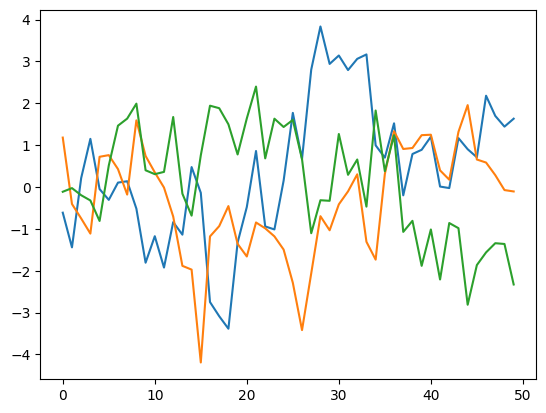

array([ 0.4001, -0.342 ,  0.1263], dtype=float16)

In [71]:
example = dgp1(100, 50, 3, 2)
plt.plot(example[2])
plt.show()
example[2].mean(axis=0)

## DGP 2: Factor structures

$$y_{t, i} = x_{t, i} \beta_{g_i} + \lambda_{g_i, i}f_{t, g_i} + \epsilon_{t, i}$$

with the same as the previous

In [72]:
def dgp2(N: int, T: int, G: int, K: int, alpha: float = 0.8):
    x = np.random.normal(loc=0.0, scale=1.0, size=(N, T, K))
    beta = np.vstack([np.ones(K) + offset_for_group_g for offset_for_group_g in range(G)])
    f = np.zeros((T, G))
    eta = np.random.normal(loc=0.0, scale=1.0, size=(T, G))
    f[0, :] = eta[0, :]
    for t in range(1, T):
        f[t, :] = alpha * f[t - 1, :] + eta[t, :]
    l = np.random.uniform(1, 5, size=N)
    epsilon = np.random.normal(size=(N, T))
    g = np.random.choice(G, size=N)

    y = np.zeros((N, T))
    for i in range(N):
        y[i] = x[i] @ beta[g[i]] + l[i]*f[:, g[i]] + epsilon[i]

    x = np.float16(x)
    y = np.float16(y)
    f = np.float16(f)
    l = np.float16(l)
    g = np.int8(g)

    return x, y, f, g, l

In [73]:
example = dgp2(300, 100, 3, 3)
example

(array([[[-0.5464  , -0.294   ,  0.83    ],
         [-0.7627  ,  1.15    , -1.188   ],
         [-0.7783  ,  1.673   , -0.4785  ],
         ...,
         [-1.426   ,  0.5586  ,  1.699   ],
         [ 0.2366  ,  0.654   , -1.672   ],
         [-1.045   ,  1.784   ,  0.2471  ]],
 
        [[ 0.591   , -0.508   , -0.04855 ],
         [-0.6543  ,  1.691   ,  0.5923  ],
         [-0.678   , -1.509   , -0.6255  ],
         ...,
         [ 1.246   ,  1.192   , -0.10175 ],
         [-0.823   ,  0.5854  ,  0.9473  ],
         [-0.559   ,  0.715   , -1.551   ]],
 
        [[-0.998   ,  0.579   ,  0.271   ],
         [ 1.725   , -1.096   , -0.774   ],
         [ 0.3574  ,  1.082   , -0.346   ],
         ...,
         [-0.2139  , -0.558   , -1.773   ],
         [-0.2986  , -0.588   , -0.542   ],
         [-1.123   ,  0.4224  , -1.84    ]],
 
        ...,
 
        [[-1.537   , -1.768   ,  0.3665  ],
         [-0.4214  ,  0.718   ,  0.2925  ],
         [ 0.2117  ,  0.11743 , -1.288   ],
         .

In [ ]:
for n in (100, 200):
    for t in (20, 50):
        for G in (3, 6, 10):
            for k in (3,):
                print(f"n={n}, t={t}, G={G}, k={k}")
                examples = []
                for i in range(500):
                    examples.append(dgp2(n, t, G, k, 0.0))
                with open(f"generated_data/dgp2_n{n}_t{t}_G{G}_k{k}_iid.pkl", "wb") as f:
                    pickle.dump(examples, f, protocol=pickle.HIGHEST_PROTOCOL)

n=100, t=20, G=3, k=3
n=100, t=20, G=6, k=3
n=100, t=20, G=10, k=3
n=100, t=50, G=3, k=3
n=100, t=50, G=6, k=3
n=100, t=50, G=10, k=3
n=200, t=20, G=3, k=3
n=200, t=20, G=6, k=3
n=200, t=20, G=10, k=3
n=200, t=50, G=3, k=3
n=200, t=50, G=6, k=3
n=200, t=50, G=10, k=3


## DGP 3:

Testing for su, Shi, \& Philips.
$$y_{t, i} = x_{t, i} \beta_{g_i} + \alpha_i + \epsilon_{t, i}$$

In [75]:
def dgp3(N: int, T: int, G: int, K: int):
    x = np.random.normal(size=(N, T, K))
    mu = np.zeros(N)
    epsilon = np.random.normal(size=(N, T))
    beta = np.vstack([np.ones(K) + offset_for_group_g for offset_for_group_g in range(G)])
    g = np.random.choice(G, size=N)

    y = np.zeros((N, T))
    for i in range(N):
        y[i] = x[i] @ beta[g[i]] + mu[i] + epsilon[i]

    x = np.float16(x)
    y = np.float16(y)
    g = np.int8(g)

    return x, y, g

In [77]:
example = dgp3(100, 50, 3, 3)
example

(array([[[ 0.4443 ,  1.165  , -2.037  ],
         [-0.772  ,  3.07   ,  0.03004],
         [-0.034  , -1.121  ,  1.152  ],
         ...,
         [ 0.584  ,  0.2017 , -0.4453 ],
         [-1.165  ,  1.773  ,  0.2666 ],
         [ 0.1473 ,  0.2896 , -0.842  ]],
 
        [[ 0.03857,  2.916  , -0.4626 ],
         [ 0.8477 ,  0.6416 ,  0.2139 ],
         [ 0.787  , -0.793  , -0.7886 ],
         ...,
         [ 1.332  , -1.739  ,  1.132  ],
         [-1.053  , -0.2952 , -0.1407 ],
         [-0.0585 , -0.4417 ,  1.67   ]],
 
        [[ 0.898  , -0.3384 , -0.9434 ],
         [-0.5835 , -0.886  ,  0.723  ],
         [-0.0544 , -0.5273 ,  1.962  ],
         ...,
         [ 0.11633, -0.945  ,  0.8403 ],
         [ 0.4243 ,  0.6294 ,  0.234  ],
         [-0.562  ,  1.578  , -1.491  ]],
 
        ...,
 
        [[-1.996  , -0.3875 ,  1.074  ],
         [ 1.784  ,  0.11633,  2.133  ],
         [-0.102  , -1.098  ,  0.578  ],
         ...,
         [-1.113  ,  0.10345,  1.491  ],
         [-0.2703 

In [78]:
for n in (100, 200):
    for t in (20, 50):
        for G in (3, 6, 10):
            for k in (3,):
                print(f"n={n}, t={t}, G={G}, k={k}")
                examples = []
                for i in range(500):
                    examples.append(dgp3(n, t, G, k))
                with open(f"generated_data/dgp3_n{n}_t{t}_G{G}_k{k}.pkl", "wb") as f:
                    pickle.dump(examples, f, protocol=pickle.HIGHEST_PROTOCOL)

n=100, t=20, G=3, k=3
n=100, t=20, G=6, k=3
n=100, t=20, G=10, k=3
n=100, t=50, G=3, k=3
n=100, t=50, G=6, k=3
n=100, t=50, G=10, k=3
n=200, t=20, G=3, k=3
n=200, t=20, G=6, k=3
n=200, t=20, G=10, k=3
n=200, t=50, G=3, k=3
n=200, t=50, G=6, k=3
n=200, t=50, G=10, k=3
